# Sentiment Analysis with Deep Learning using BERT

### Project Outline

**Task 1**: Loading the Data

**Task 2**: Loading Tokenizer and Encoding our Data

**Task 3**: Setting up BERT Pretrained Model

**Task 4**: Creating Data Loaders

**Task 5**: Setting Up Optimizer and Scheduler

**Task 6**: Defining our Performance Metrics

**Task 7**: Creating our Training Loop

## Loading the Data


In [ ]:
from google.colab import drive
import pandas as pd
from pandas import DataFrame

In [ ]:
drive.mount('/content/drive')  # asks for authentication
train_df = pd.read_csv("/content/drive/My Drive/Independent Work/train.csv")
validation_df = pd.read_csv("/content/drive/My Drive/Independent Work/validation.csv")
test_df = pd.read_csv("/content/drive/My Drive/Independent Work/test.csv")

Mounted at /content/drive


In [ ]:
train_df["document"][0]

"As talk-shows go, Larry King Live is not bad, and since he occasionally gets good guests, it's a show to turn on once in awhile, but not compulsively. When Bill Maher, Carl Bernstein, a former president, or other substantive guests sit across from him, it's not too bad. Other times, he tends to host guests involved in the latest celebrity scandal which contributes absolutely no intelligent information to the country and feeds a largely uneducated public that wants to hear the latest gossip about movie and TV stars. During the OJ Simpson trial, it seemed like every other guest on his show was related to the case. But is this really journalism? Or the National Enquirer on the tube? Sometimes, it comes off a little bit like trash television--Jerry Springer in a sit down interview with phone calls instead of a live audience.On the other side, King's show is definitely much better than Bill O'Reilly whose show is nothing more than a rightest-political platform of the Rush Limbaugh variety.

In [ ]:
validation_df

,Unnamed: 0,document,sentiment
0,0,Don't quite know why some people complain abou...,1
1,1,"The Kite Runner was beautiful, poignant and ve...",1
2,2,I absolutely loved this movie! It's my number ...,1
3,3,I could not watch more than 10 minutes of this...,0
4,4,This movie doesn't even deserve a 1/10 This mo...,0
...,...,...,...
4995,4995,"""Crimes of Passion"" is a film that is disappoi...",0
4996,4996,Not only unique for its time but one of the gr...,1
4997,4997,"This was an interesting movie...half-comedy, h...",1
4998,4998,I LOVE Sandra Bullock-She's one of my all-time...,0


In [ ]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


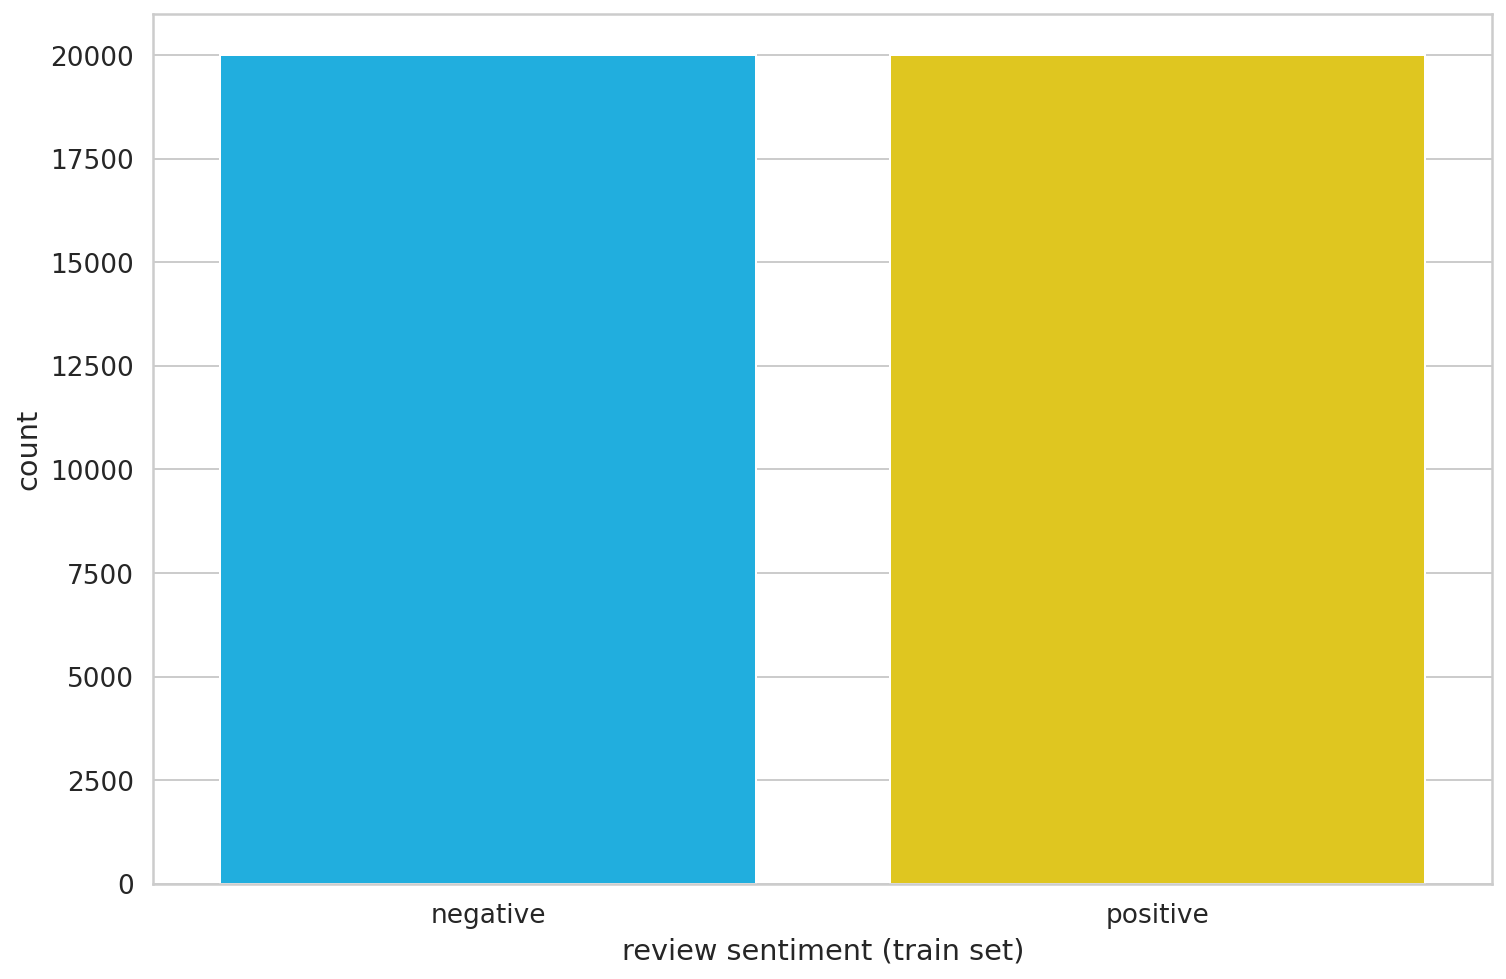

In [ ]:
class_names = ['negative','positive']
ax = sns.countplot(train_df["sentiment"])
plt.xlabel('review sentiment (train set)');
ax.set_xticklabels(class_names);


In [ ]:
# Next, I will choose the dataset size

train_text, train_sentiment = train_df["document"], train_df["sentiment"]
validation_text, validation_sentiment = validation_df["document"], validation_df["sentiment"]
test_text, test_sentiment = test_df["document"], test_df["sentiment"]

In [ ]:
train_text, train_sentiment


(0        As talk-shows go, Larry King Live is not bad, ...
 1        This movie was made on a relatively small budg...
 2        I had the misfortune to sit through the full 1...
 3        This movie is the very worst that I have ever ...
 4        I would never have thought I would almost cry ...
                                ...                        
 39995    I must, in light of the encomia of praise for ...
 39996    Here we have a miniseries, which revels in in ...
 39997    James J. Corbett's autobiography "The Roar of ...
 39998    I've had a thing for this Kari chick for a whi...
 39999    Sorry, but aside from Kim Basinger doing a goo...
 Name: document, Length: 40000, dtype: object, 0        1
 1        1
 2        0
 3        0
 4        1
         ..
 39995    0
 39996    1
 39997    1
 39998    0
 39999    0
 Name: sentiment, Length: 40000, dtype: int64)

## Loading Tokenizer and Encoding our Data

In [ ]:
!pip install transformers
from transformers import BertTokenizer

     |████████████████████████████████| 1.3MB 4.5MB/s 
     |████████████████████████████████| 1.1MB 28.5MB/s 
     |████████████████████████████████| 890kB 38.2MB/s 
     |████████████████████████████████| 2.9MB 49.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=c5636ce14991b6fdc61bdf5f0ec7ec7a97519957bfdd8cfe5ed0030718d0e171
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME, 
                                          do_lower_case=True)

In [ ]:
# test the tokenizer
sample_txt = 'When was I last outside? I am stuck at home for 2 weeks.'

In [ ]:
# visualize the encoding for out sample text
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: When was I last outside? I am stuck at home for 2 weeks.
   Tokens: ['when', 'was', 'i', 'last', 'outside', '?', 'i', 'am', 'stuck', 'at', 'home', 'for', '2', 'weeks', '.']
Token IDs: [2043, 2001, 1045, 2197, 2648, 1029, 1045, 2572, 5881, 2012, 2188, 2005, 1016, 3134, 1012]


In [ ]:
import numpy as np

 Largest sequence length: 2450
 Largest sequence index: 31135
 Shortest sequence length: 4
 Shortest sequence index: 16714


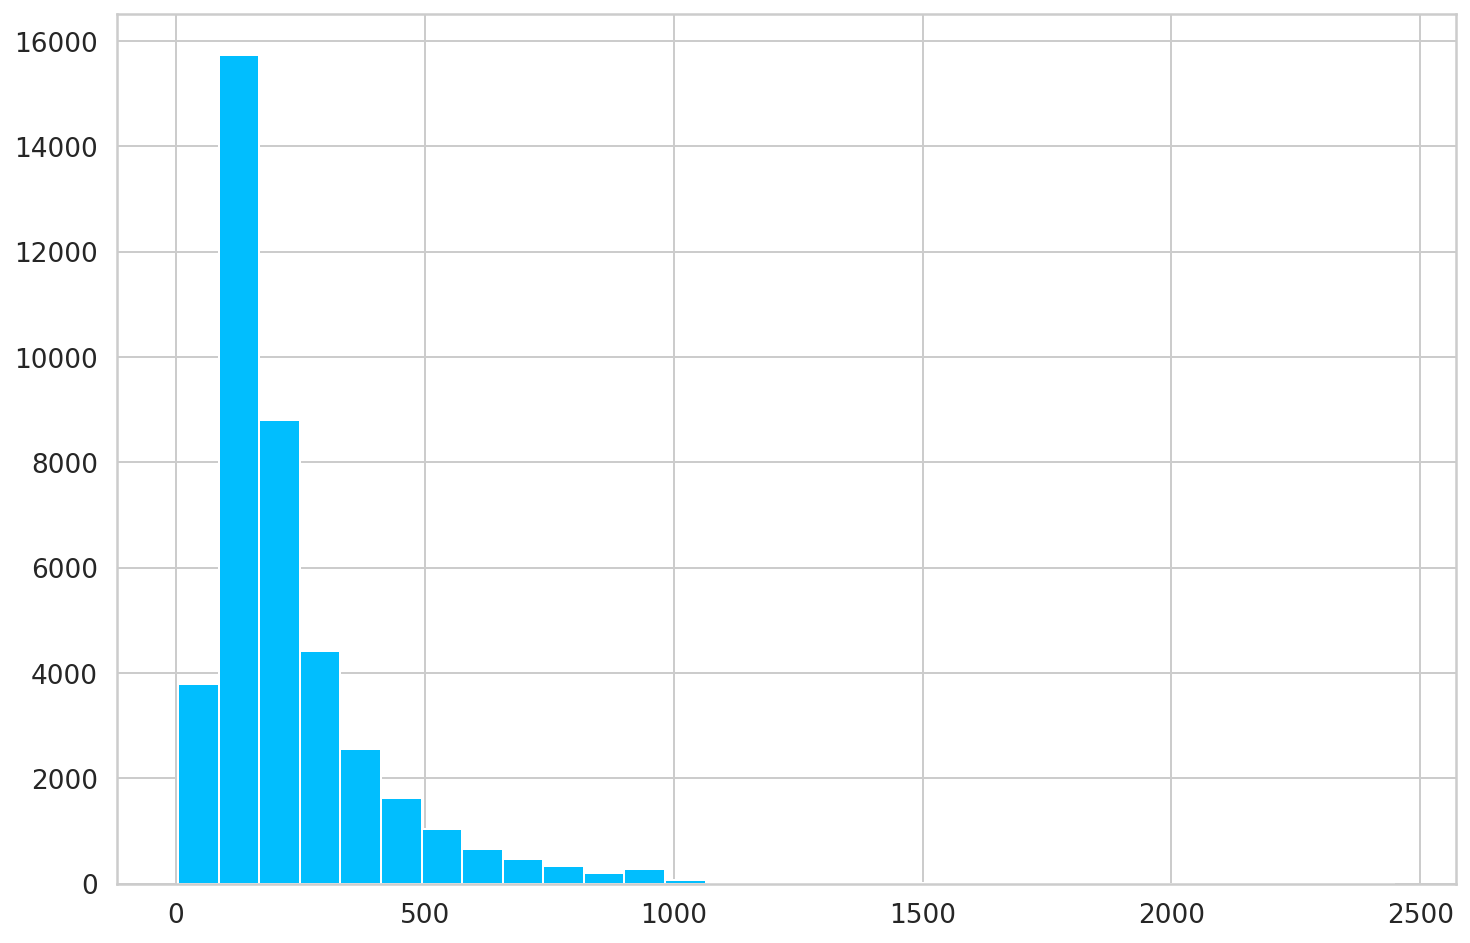

In [ ]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 30)
largest_seq_len = max(seq_len)
shortest_seq_len = min(seq_len)
largest_seq_len_index = seq_len.index(largest_seq_len)
shortest_seq_len_index = seq_len.index(shortest_seq_len)
average_seq_len = np.mean(seq_len)

print(f' Largest sequence length: {largest_seq_len}')
print(f' Largest sequence index: {largest_seq_len_index}')
print(f' Shortest sequence length: {shortest_seq_len}')
print(f' Shortest sequence index: {shortest_seq_len_index}')

sorted_seq_len = np.sort(seq_len)



In [ ]:
# Set max_seq_len by picking the 80th percentile in the sorted list of sequence lenghts
max_seq_len_index = np.round((len(sorted_seq_len) * 4) // 5) - 1
max_seq_len = sorted_seq_len[max_seq_len_index]
max_seq_len


314

In [ ]:

# tokenize and encode sequences in the training set
encoded_data_train = tokenizer.batch_encode_plus(
    train_text.tolist(), 
    add_special_tokens=True, 
    return_attention_mask=True, 
    padding='max_length', 
    max_length=max_seq_len, 
    truncation=True,
    return_tensors='pt'
)

# tokenize and encode sequences in the validation set
encoded_data_val = tokenizer.batch_encode_plus(
    validation_text.tolist(), 
    add_special_tokens=True, 
    return_attention_mask=True, 
    padding='max_length', 
    max_length=max_seq_len,
    truncation=True, 
    return_tensors='pt'
)

# tokenize and encode sequences in the test set
encoded_data_test = tokenizer.batch_encode_plus(
    test_text.tolist(), 
    add_special_tokens=True, 
    return_attention_mask=True, 
    padding='max_length', 
    max_length=max_seq_len,
    truncation=True, 
    return_tensors='pt'
)

In [ ]:
#tokenizer.convert_ids_to_tokens(encoded_data_test["input_ids"][0])

In [ ]:
import torch
from torch.utils.data import TensorDataset

In [ ]:
# Get tensors for the input ids, the attention masks, and the labels for our datasets
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(train_sentiment.tolist())

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(validation_sentiment.tolist())

input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(test_sentiment.tolist())

In [ ]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)
dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)

In [ ]:
len(dataset_train)

40000

In [ ]:
len(dataset_test)

5000

## Setting up BERT Pretrained Model

In [ ]:
from transformers import BertForSequenceClassification
from torch import nn
import random

seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
# import BERT-base pretrained model
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'
model = BertForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL_NAME,
                                                      num_labels=2,
                                                      output_attentions=False,
                                                      output_hidden_states=False)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

## Creating Data Loaders

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

In [ ]:
batch_size = 32

dataloader_train = DataLoader(dataset_train, 
                              num_workers = 4,
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   num_workers = 4,
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

dataloader_test = DataLoader(dataset_test, 
                             num_workers = 4,
                             sampler=SequentialSampler(dataset_test), 
                             batch_size=batch_size)

## Setting Up Optimiser and Scheduler

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr=2e-5,
                  correct_bias=False)

In [ ]:
epochs = 10

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

## Defining our Performance Metrics

Accuracy metric approach originally used in accuracy function in [this tutorial](https://mccormickml.com/2019/07/22/BERT-fine-tuning/#41-bertforsequenceclassification).

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
def f1_score_func(preds, labels):
    return f1_score(labels, np.argmax(preds, axis=1), average='weighted')

## Creating our Training Loop

Approach adapted from an older version of HuggingFace's `run_glue.py` script. Accessible [here](https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128).

In [ ]:
from tqdm.notebook import tqdm

model.to(device)

In [ ]:
def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [ ]:
from collections import defaultdict

In [ ]:
history = defaultdict(list)
train_correct_predictions = 0
val_correct_predictions = 0
best_model = {}
drive.mount('/content/drive')

for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0
    train_predictions, train_true_vals = [], []

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        logits = outputs[1]
        loss_train_total += loss.item()
        
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        train_predictions.append(logits)
        train_true_vals.append(label_ids)


        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    #torch.save(model.state_dict(), f'temp_{epoch}.model')
    torch.save(model.state_dict(), f'bert_base_epoch_{epoch}.model')
    torch.save(model.state_dict(), f'/content/drive/My Drive/Independent Work/bert_base_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, val_predictions, val_true_vals = evaluate(dataloader_validation)

    train_predictions = np.concatenate(train_predictions, axis=0)
    train_true_vals = np.concatenate(train_true_vals, axis=0)

    train_correct_predictions = np.sum(np.argmax(train_predictions, axis=1) == train_true_vals)
    val_correct_predictions = np.sum(np.argmax(val_predictions, axis=1) == val_true_vals)

    history['train_acc'].append(train_correct_predictions/len(train_text))
    history['train_loss'].append(loss_train_avg)
    history['val_acc'].append(val_correct_predictions/len(validation_text))
    history['val_loss'].append(val_loss)

    best_model[epoch] = val_loss

    val_f1 = f1_score_func(val_predictions, val_true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



Epoch 1
Training loss: 0.2389120919749141
Validation loss: 0.17309443365521493
F1 Score (Weighted): 0.9315986757503626



Epoch 2
Training loss: 0.11370218077674508
Validation loss: 0.23445077904850053
F1 Score (Weighted): 0.9309771368668156



Epoch 3
Training loss: 0.06204994950531982
Validation loss: 0.29945446554701893
F1 Score (Weighted): 0.9311964332230984



Epoch 4
Training loss: 0.038352205176185816
Validation loss: 0.35665854786086687
F1 Score (Weighted): 0.929355847404628



Epoch 5
Training loss: 0.023182150244456717
Validation loss: 0.3955245033925352
F1 Score (Weighted): 0.9301965796324021



Epoch 6
Training loss: 0.01399793821646599
Validation loss: 0.4588190518733178
F1 Score (Weighted): 0.931590794857356



Epoch 7
Training loss: 0.011008100626594387
Validation loss: 0.4777843152541481
F1 Score (Weighted): 0.9327932793279328



Epoch 8
Training loss: 0.006487908763770247
Validation loss: 0.5501544561562568
F1 Score (Weighted): 0.9331987067269624



Epoch 9
Training loss: 0.0029890524807138718
Validation loss: 0.5862093965328614
F1 Score (Weighted): 0.932388922601079



Epoch 10
Training loss: 0.003077207187613385
Validation loss: 0.5902028178838252
F1 Score (Weighted): 0.9325940440097287



In [ ]:
# !gdown --id 1V8itWtowCYnb2Bc9KlK9SxGff9WwmogA
#model = BertForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL_NAME,
                                                      num_labels=2,
                                                      output_attentions=False,
                                                      output_hidden_states=False)
#model.load_state_dict(torch.load('bert_base_epoch_10.model'))
#model = model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
_, predictions, true_vals = evaluate(dataloader_test)
predictions = np.argmax(predictions, axis=1)
class_names = ["negative", "positive"]

In [ ]:
print(classification_report(true_vals, predictions, target_names=class_names))

              precision    recall  f1-score   support

    negative       0.94      0.93      0.93      2500
    positive       0.93      0.94      0.93      2500

    accuracy                           0.93      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000



In [ ]:
y_p = predictions
y = true_vals

good = 0
misses = []
for i in range (len(y)):
  if y_p[i] == y[i]:
    good = good + 1
  else:
    misses.append(i)

percentage = 100 * (good/len(y))
percentage

#for m in misses:
  #print(validation_df.to_numpy()[m])

93.46

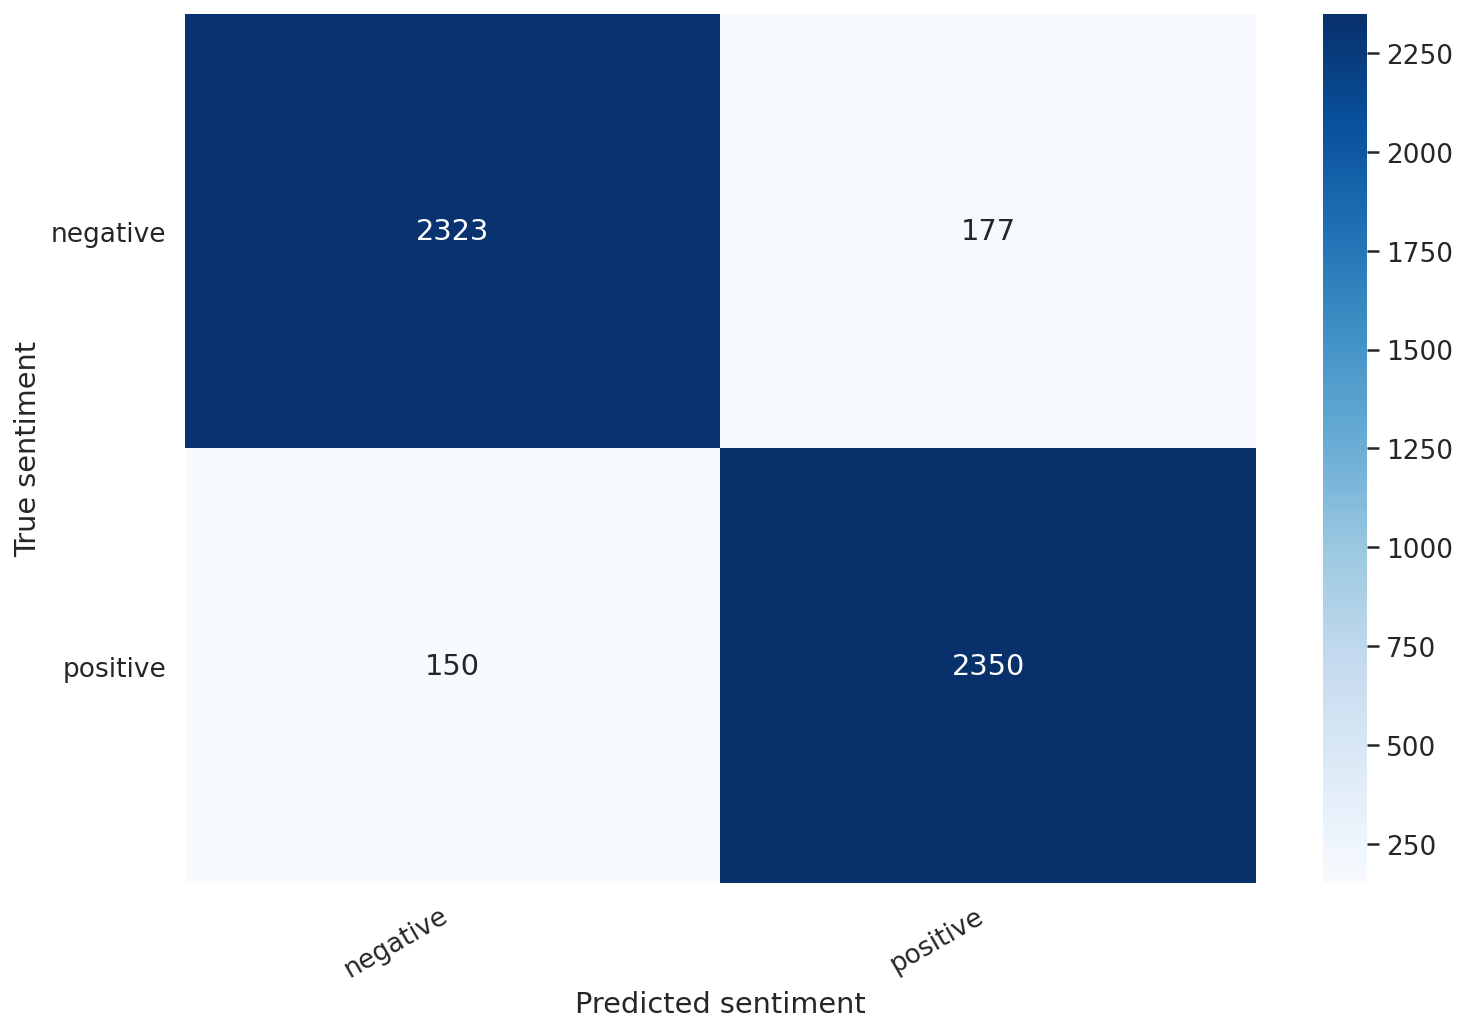

In [ ]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

cm = confusion_matrix(true_vals, predictions)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)